## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
from sklearn import neighbors, datasets, feature_selection
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [7]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head(5)

#spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [8]:
spam_data.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,0.104553,0.305358,0,0,0,0.00,4.54
word_freq_address,4601,0.213015,1.290575,0,0,0,0.00,14.28
word_freq_all,4601,0.280656,0.504143,0,0,0,0.42,5.10
word_freq_3d,4601,0.065425,1.395151,0,0,0,0.00,42.81
word_freq_our,4601,0.312223,0.672513,0,0,0,0.38,10.00


Below is display of a section of the data set.


There are 4601 rows and 57 features in the dataset.

Here is a pairplot of the first 10 columns (due to data processing time)



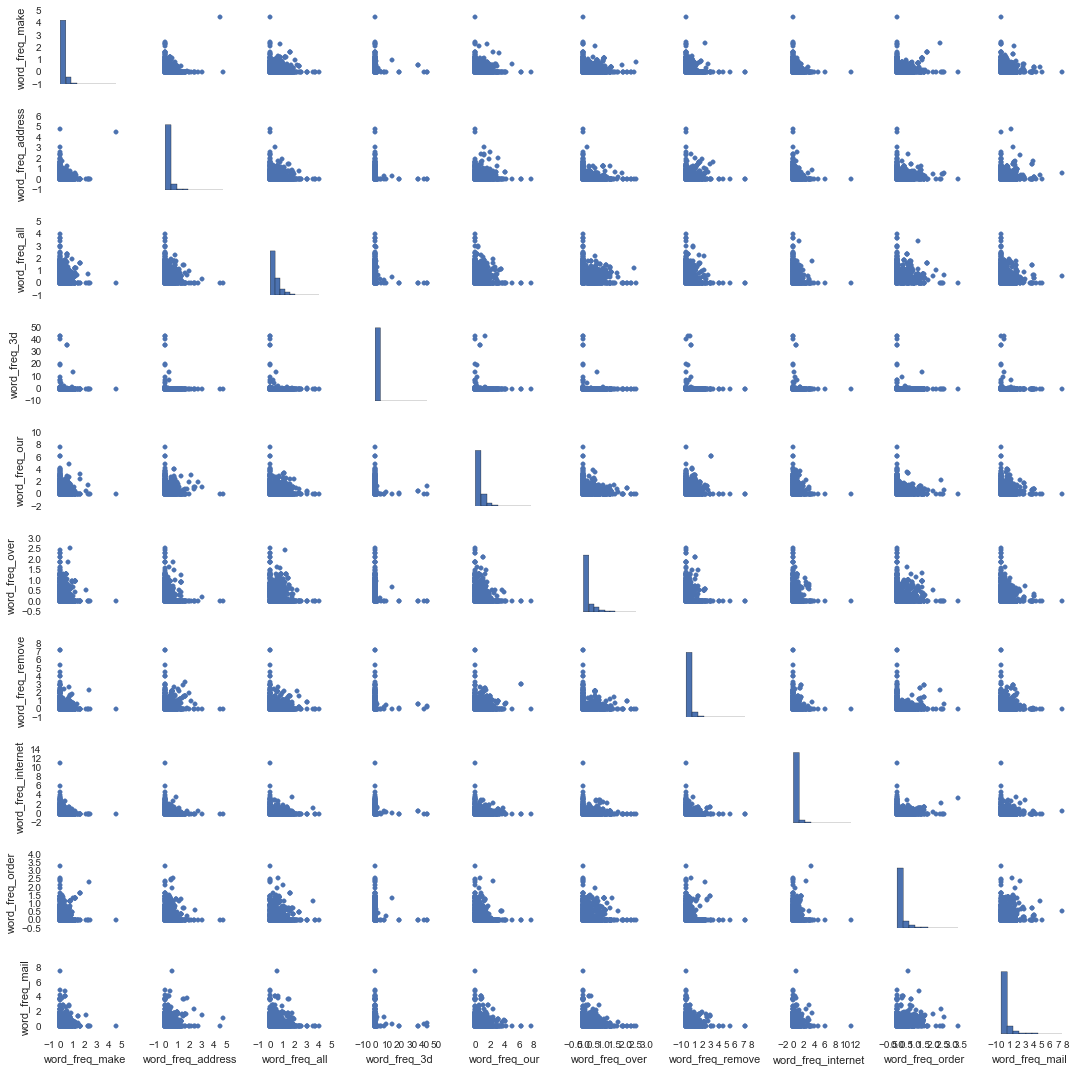

In [9]:
#your code here
print('Below is display of a section of the data set.\n\n')

x = spam_data.shape;
print('There are %d rows and %d features in the dataset.\n' % (x[0], x[1] - 1))

print('Here is a pairplot of the first 10 columns (due to data processing time)\n')

# This could be conducted to show all of the data, but it runs very slowly.
g = sns.PairGrid(spam_data.ix[1:2000,:10], size=1.5)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)


Here is the mean across the different word counts: 



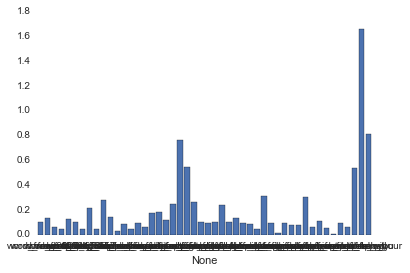

In [10]:
# Describe the mean and standard deviation across the data:
attribDF = spam_data.describe()
meanNum = attribDF.ix['mean']
stdNum = attribDF.ix['std']

print('Here is the mean across the different word counts: \n');
plotMean = sns.barplot(meanNum.index[:48], meanNum.values[:48])

Here is the standard deviation across the different word counts: 



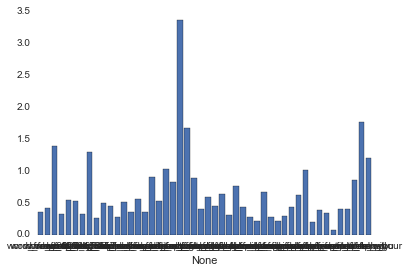

In [11]:
print('Here is the standard deviation across the different word counts: \n');
plotMean = sns.barplot(stdNum.index[:48], stdNum.values[:48])

Here is what a histogram for one of the variables looks like



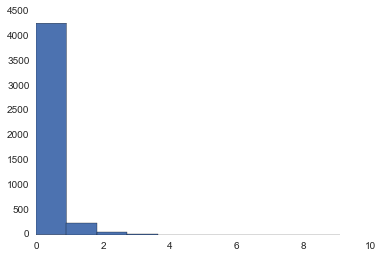

In [12]:
print('Here is what a histogram for one of the variables looks like\n');
spam_data.word_freq_email.hist()
plt.show()

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [13]:
#x = spam_data['capital_run_length_longest'] # Why doens't this work

x = pd.DataFrame(spam_data['capital_run_length_longest']) 
y = spam_data['is_spam']
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.33, random_state=42)

lgt = LogisticRegression().fit(x_train, y_train)
lgt.score(x_train, y_train)
outAcc = lgt.score(x_test, y_test)

print('The in sample accuracy is: %f \n The out of sample fit is: %f\n' % (lgt.score(x_train, y_train),  outAcc))

The in sample accuracy is: 0.733939 
 The out of sample fit is: 0.717577



In [14]:
# Look at the consistency across the 48 continuous real [0,100] attributes of type word_freq_WORD
accList = pd.DataFrame(index= spam_data.columns[:48], columns = ['inSampleScore', 'outSampleScore'])

# Loop through each one
for feat in spam_data.columns[:48]:
    # Set the train test for each variable:
    x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(spam_data[feat]), spam_data['is_spam'], test_size=0.30, random_state=12)
    
    # Set-up and train the logit model:
    lgt2 = LogisticRegression()
    lgt2.fit(x_train, y_train)
    # Save down the scores:
    accList.loc[feat,'inSampleScore'] = lgt2.score(x_train, y_train)
    accList.loc[feat,'outSampleScore'] = lgt2.score(x_test, y_test)

print('First 10 results\n')
accList

First 10 results



,inSampleScore,outSampleScore
word_freq_make,0.6130435,0.6249095
word_freq_address,0.6003106,0.6191166
word_freq_all,0.6319876,0.6278059
word_freq_3d,0.6062112,0.6256336
word_freq_our,0.6667702,0.6705286
word_freq_over,0.6708075,0.6705286
word_freq_remove,0.7279503,0.7516293
word_freq_internet,0.6639752,0.6835626
word_freq_order,0.6599379,0.6647357
word_freq_mail,0.6279503,0.622013


It looks like the distribution is unevenly distrubuted, which may be why there is poor accuracy for some variables.


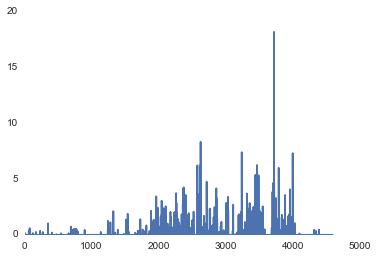

In [15]:
print('It looks like the distribution is unevenly distrubuted, which may be why there is poor accuracy for some variables.')

checkFeat = ['word_freq_money', 'word_freq_data', 'word_freq_85']
plt.plot(spam_data[checkFeat[1]])
plt.show()

Here is the in sample scores for each individual feature: 



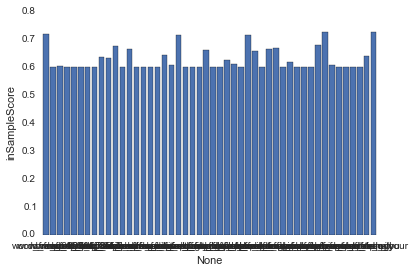

In [16]:
print('Here is the in sample scores for each individual feature: \n');
pltAcc = sns.barplot(accList.index, accList['inSampleScore'])

Here is the out of sample scores for each individual feature: 



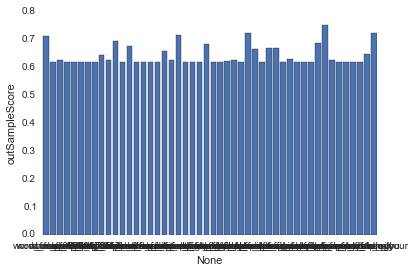

In [17]:
print('Here is the out of sample scores for each individual feature: \n');
pltAcc = sns.barplot(accList.index, accList['outSampleScore'])

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [18]:
# Train test split the data:
x_train, x_test, y_train, y_test = train_test_split(spam_data[spam_data.columns[:48]], spam_data['is_spam'], test_size=0.30, random_state=12)

#print(x_test.shape)
#print(y_test.shape)

# Train model
lgt3 = LogisticRegression()
lgt3.fit(x_train, y_train)
accIn = lgt3.score(x_train, y_train)
accOut = lgt3.score(x_test, y_test)

# print for viewer 
print('The in sample accuracy of using 48 variables is: %f \nThe out of sample fit is: %f\n' % (accIn,  outAcc))
print('Looks like we over fit the model!')



The in sample accuracy of using 48 variables is: 0.918634 
The out of sample fit is: 0.717577

Looks like we over fit the model!


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [19]:
#your code here
lgt4 = LogisticRegression()
scores_cv = cross_val_score(lgt4, pd.DataFrame(spam_data[spam_data.columns[:48]]), spam_data['is_spam'], cv=5)
scores_cv = pd.DataFrame(scores_cv, columns = ['scores'])
scores_cv

,scores
0,0.909881
1,0.909881
2,0.879479
3,0.922742
4,0.810664


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [20]:
# Setup the K-Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
scoresKNN = cross_val_score(clf, pd.DataFrame(spam_data[spam_data.columns[:48]]), spam_data['is_spam'], cv=5)
scoresKNN = pd.DataFrame(scoresKNN, columns = ['scores'])
scoresKNN



,scores
0,0.849077
1,0.882736
2,0.861021
3,0.859630
4,0.717084


In [21]:
diffMeth = scores_cv - scoresKNN
print('The logistic regression has a higher score across each cross validation set:\n')
print(diffMeth)


The logistic regression has a higher score across each cross validation set:

     scores
0  0.060803
1  0.027144
2  0.018458
3  0.063112
4  0.093580


### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [22]:
# Which curves:
x_train, x_test, y_train, y_test = train_test_split(spam_data[spam_data.columns[:48]], spam_data['is_spam'], test_size=0.30, random_state=12)

lgt6a = LogisticRegression()
x_trainFeat = lgt6a.fit_transform(x_train, y_train)
x_testFeat = lgt6a.transform(x_test)

lgt6b = LogisticRegression()
lgt6b.fit(x_trainFeat, y_train)

accIn = lgt6b.score(x_trainFeat, y_train)
accOut = lgt6b.score(x_testFeat, y_test)

print('Using Feature Selection:\nThe in sample accuracy of using 48 variables is: %f \nThe out of sample fit is: %f\n' % (accIn,  accOut))



Using Feature Selection:
The in sample accuracy of using 48 variables is: 0.904037 
The out of sample fit is: 0.887762



In [23]:
# What if I hand-pick the top 10 send alone in sample features?
topN = 10;
accListSorted = accList.sort(['inSampleScore'], ascending=[0])
featList = accListSorted.index[:10]
print(featList[:10])

# Train test split:
x_train, x_test, y_train, y_test = train_test_split(spam_data[featList], spam_data['is_spam'], test_size=0.30, random_state=12)

lgt6c = LogisticRegression()
lgt6c.fit(x_train, y_train)

accIn = lgt6c.score(x_train, y_train)
accOut = lgt6c.score(x_test, y_test)

print('It looks like the feature selection is overfitting in the test - train feature selection.\n');
print('Using manual feature Selection:\nThe in sample accuracy of using the top %d standlone in ' \
      'sample features: %f \nThe out of sample fit is: %f\n' % (topN, accIn,  accOut))
print('This is a dumb way to do it and will not be used going forward')


Index([u'word_freq_remove', u'word_freq_your', u'word_freq_000', u'word_freq_money', u'word_freq_free', u'word_freq_receive', u'word_freq_business', u'word_freq_over', u'word_freq_our', u'word_freq_credit'], dtype='object')
It looks like the feature selection is overfitting in the test - train feature selection.

Using manual feature Selection:
The in sample accuracy of using the top 10 standlone in sample features: 0.857453 
The out of sample fit is: 0.844316

This is a dumb way to do it and will not be used going forward


### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [24]:
def plot_roc_curve(target_test, target_predicted_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

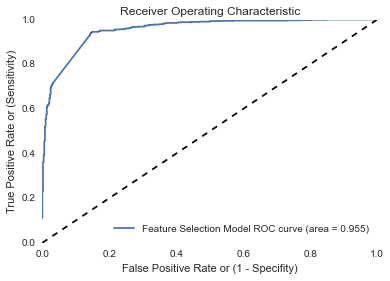

In [25]:
# Re-Run just to make sure nothing weird happened:
x_train, x_test, y_train, y_test = train_test_split(spam_data[spam_data.columns[:48]], spam_data['is_spam'], test_size=0.30, random_state=12)

lgt6a = LogisticRegression()
x_trainFeat = lgt6a.fit_transform(x_train, y_train)
x_testFeat = lgt6a.transform(x_test)

lgt6b = LogisticRegression()
lgt6b.fit(x_trainFeat, y_train)

# using the smaller feature set, lets take a look:
target_predicted_proba = lgt6b.predict_proba(x_testFeat)
plot_roc_curve(y_test, target_predicted_proba, ['Feature Selection Model'])

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [26]:
#Your code here
print('We can see from the ROC curve above that the number of true positives increases, but this' \
      'does not mean accuracy imporved. Here I check the accuracy of the feature selection ' \
      'method using a freshold of 70%.')

# Re-Run just to make sure nothing weird happened:
x_train, x_test, y_train, y_test = train_test_split(spam_data[spam_data.columns[:48]], spam_data['is_spam'], test_size=0.30, random_state=12)

lgt8a = LogisticRegression()
x_trainFeat = lgt8a.fit_transform(x_train, y_train)
x_testFeat = lgt8a.transform(x_test)

lgt8b = LogisticRegression(class_weight={0:0.10, 1:0.90})
lgt8b.fit(x_trainFeat, y_train)

accIn = lgt8b.score(x_trainFeat, y_train)
accOut = lgt8b.score(x_testFeat, y_test)

print('Shifting the class weights makes for a less accurate model.\n')
print('The in sample accuracy is %f\n' \
      'The out of sample fit is: %f\n' %(accIn,  accOut))


We can see from the ROC curve above that the number of true positives increases, but thisdoes not mean accuracy imporved. Here I check the accuracy of the feature selection method using a freshold of 70%.
Shifting the class weights makes for a less accurate model.

The in sample accuracy is 0.747516
The out of sample fit is: 0.745112



###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

####your discussion here

The threhsold model determines the probabiity boundary we want to have in our model. If there is a high cost to mis-classifing one of the states, it may be beneficial to move the decision threshold above 50%. I guess the easiest way to think about it is the concept of 'beyond a resonable doubt'. You may want to push the decision boundary even if it isn't optimal from an error minimization standpoint. If the classification calls for a non-normal action with opportunity cost (in finance, the equivalent would be not investing in the stock market) then there is a cost to being wrong (type one error).

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [27]:
#your code here

In [28]:
#your visualization here